### **Calculating financial returns**

The file you loaded in the previous exercise included daily Open, High, Low, Close, Adjusted Close, and Volume data, often referred to as `OHLCV` data.

The ***Adjusted Close*** column is the most important. It is normalized for stock splits, dividends, and other corporate actions, and is a true reflection of the return of the stock over time. You will be using the adjusted close price to calculate the returns of the stock in this exercise.


* Calculate the simple returns of the stock on the `'Adjusted'` column and save it to the `'Returns'` column.

,Open,High,Low,Close,Volume,Adjusted,Returns
Date,,,,,,,
2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809,NaN
2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345,-0.033780
2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851,0.010544
2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688,-0.033498
2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828,0.013068


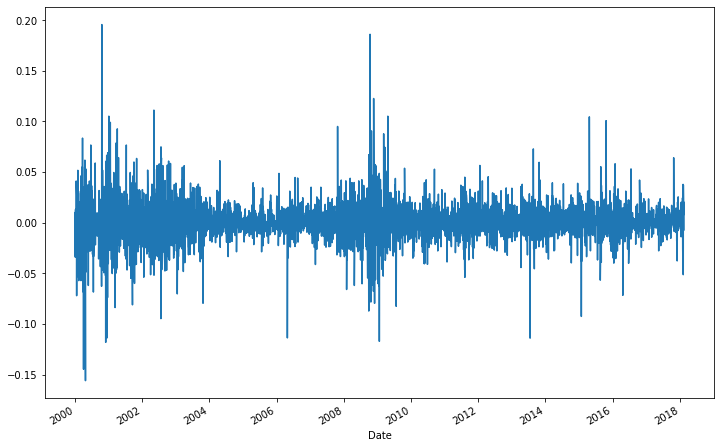

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

StockPrices = pd.read_csv("MSFTPrices.csv", parse_dates=["Date"], index_col="Date")

# Calculate the daily returns of the adjusted close price
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()

# Check the first five rows of StockPrices
display(StockPrices.head())

# Plot the returns column over time
StockPrices['Returns'].plot(figsize=(12,8))
plt.show()

### **Return distributions**

In order to analyze the probability of outliers in returns, it is helpful to visualize the historical returns of a stock using a histogram.

You can use the histogram to show the historical density or frequency of a given range of returns. Note the outliers on the left tail of the return distribution are what you often want to avoid, as they represent large negative daily returns. Outliers on the right hand side of the distribution are normally particularly good events for the stock such as a positive earnings surprise.

* Convert the `'Returns'` column from decimal to percentage returns and assign it to `percent_return`.
* Drop the missing values (represented as `NaN`) from `percent_return` and save the result to `returns_plot`.
* Plot a histogram of `returns_plot` with `75` bins using matplotlib's `hist()` function.

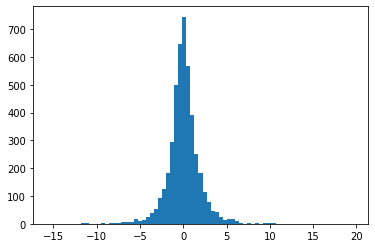

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

StockPrices = pd.read_csv("MSFTPrices.csv", parse_dates=["Date"], index_col="Date")

# Calculate the daily returns of the adjusted close price
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()

# Convert the decimal returns into percentage returns
percent_return = StockPrices['Returns']*100

# Drop the missing values
returns_plot = percent_return.dropna()

# Plot the returns histogram
plt.hist(returns_plot, bins=75)
plt.show()

### **First moment: $\mu$**

You can calculate the average historical return of a stock by using numpy's `mean()` function.

When you are calculating the ***average daily return*** of a stock, you are essentially estimating the first moment ($\mu$) of the historical returns distribution.

But what use are daily return estimates to a long-term investor? You can use the formula below to estimate the average annual return of a stock given the average daily return and the number of trading days in a year (typically there are roughly `252` trading days in a year):

$$\text{Average Annualized Return} = (1 + \mu)^{252}-1 $$

* Calculate the mean of the `'Returns'` column to estimate the first moment ($\mu$) and set it equal to `mean_return_daily`.
* Use the formula to derive the average annualized return assuming `252` trading days per year. 

In [6]:
import numpy as np
import pandas as pd

StockPrices = pd.read_csv("MSFTPrices.csv", parse_dates=["Date"], index_col="Date")
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()

# Calculate the average daily return of the stock
mean_return_daily = np.mean(StockPrices['Returns'])
print(f"mean_return_daily: {mean_return_daily*100:.2f}% per day")

# Calculate the implied annualized average return
mean_return_annualized = (1 + mean_return_daily)**252 - 1
print(f"mean_return_annualized: {mean_return_annualized*100:.2f}% per year")

mean_return_daily: 0.04% per day
mean_return_annualized: 9.99% per year


### **Second moment: Variance**

First, calculate the daily standard deviation ($\sigma$), or **volatility** of the returns using `np.std()`. *The variance is simply* $\sigma^2$.

* Calculate the daily standard deviation of the `'Returns'` column and set it equal to `sigma_daily`.
* Derive the daily variance (second moment, $\sigma^2$) by squaring the standard deviation.

In [9]:
import numpy as np
import pandas as pd

StockPrices = pd.read_csv("MSFTPrices.csv", parse_dates=["Date"], index_col="Date")
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()

# Calculate the standard deviation of daily return of the stock
sigma_daily = np.std(StockPrices['Returns'])
print(f"Standard deviation of daily return: {sigma_daily*100:.2f}% per day")

# Calculate the daily variance
variance_daily = sigma_daily**2
print(f"daily variance: {variance_daily:.4f}")

Standard deviation of daily return: 1.93% per day
daily variance: 0.0004


### **Annualizing variance**

You can't annualize the variance in the same way that you annualized the mean.

In this case, you will need to ***multiply  by the <ins>square root of the number of trading days</ins> in a year***. There are typically `252` trading days in a calendar year. Let's assume this is the case for this exercise.

This will get you the annualized volatility, but to get annualized variance, you'll need to square the annualized volatility just like you did for the daily calculation.

* Annualize `sigma_daily` by multiplying by the square root of `252` (the number of trading days in a years).
* Once again, square `sigma_annualized` to derive the annualized variance.

In [11]:
import numpy as np
import pandas as pd

StockPrices = pd.read_csv("MSFTPrices.csv", parse_dates=["Date"], index_col="Date")
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()
σ = np.std(StockPrices['Returns'])

# Annualize the standard deviation
σ_annualized = σ*np.sqrt(252)
print(f"Annual standard deviation: {σ_annualized * 100:.2f}%")

# Calculate the annualized variance
variance_annualized = σ_annualized**2
print(f"Annual variance: {variance_annualized:.4f}")

Annual standard deviation: 30.70%
Annual variance: 0.0943


# **Skewness**

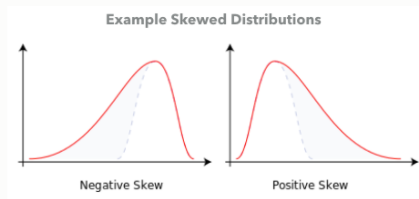

# **Kurtosis**

* Normally computed as "Excess" Kurtosis different from 3. E.g., actual kurtosis is 4, then the kurtosis computed is 1.

### **Third moment: Skewness**

To calculate the third moment, or skewness of a returns distribution in Python, you can use the `skew()` function from `scipy.stats`.

Remember that a negative skew is a right-leaning curve, while positive skew is a left-leaning curve. In finance, ***you would tend to want positive skewness, as this would mean that the probability of large positive returns is unusually high***, and the negative returns are more closely clustered and predictable.

* Drop missing values in the `'Returns'` column to prevent errors.
* Calculate the skewness of `clean_returns`.


In [12]:
import numpy as np
import pandas as pd
from scipy.stats import skew

StockPrices = pd.read_csv("MSFTPrices.csv", parse_dates=["Date"], index_col="Date")
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()

# Drop the missing values
clean_returns = StockPrices["Returns"].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness = skew(clean_returns)
print(returns_skewness)

0.21935459193067852


A normal distribution would have a skewness ***much closer*** to 0.

### **Fourth moment: Kurtosis**

Finally, to calculate the fourth moment of a distribution, you can use the `kurtosis()` function from `scipy.stats`.

Note that this function actually returns the excess kurtosis, not the 4th moment itself. In order to calculate kurtosis, simply add 3 to the excess kurtosis returned by `kurtosis()`.

* Use `clean_returns` to calculate the `excess_kurtosis`.
* Derive the `fourth_moment` from `excess_kurtosis`.

In [13]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

StockPrices = pd.read_csv("MSFTPrices.csv", parse_dates=["Date"], index_col="Date")
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()
clean_returns = StockPrices["Returns"].dropna()

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = kurtosis(clean_returns)
print(f"Excess kurtosis: {excess_kurtosis:.2f}")

# Derive the true fourth moment of the returns distribution
fourth_moment = excess_kurtosis + 3
print(f"Actual kurtosis: {fourth_moment:.2f}")

Excess kurtosis: 10.31
Actual kurtosis: 13.31


### **Statistical tests for normality**

In order to truly be confident in your judgement of the normality of the stock's return distribution, you will want to use a true statistical test rather than simply examining the kurtosis or skewness.

You can use the `shapiro()` function from `scipy.stats` to run a ***Shapiro-Wilk*** test of normality on the stock returns. The function will return two values in a list. 

* t-stat of the test
* p-value 

You can use the p-value to make a judgement about the normality of the data. If the p-value is less than or equal to 0.05, you can safely reject the null hypothesis of normality and assume that the data are non-normally distributed.

* Run the `Shapiro-Wilk` test on `clean_returns`.
* Extract the p-value from the `shapiro_results` tuple.

In [14]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro

StockPrices = pd.read_csv("MSFTPrices.csv", parse_dates=["Date"], index_col="Date")
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()
clean_returns = StockPrices["Returns"].dropna()

# Run the Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(clean_returns)
print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)

Shapiro results: (0.9003633260726929, 0.0)
P-value:  0.0


The p-value is 0, so null hypothesis of normality is rejected. The data are non-normal.

# **Calculating Portfolio Returns**

$$R_p = w_{a_1}R_{a_1} + w_{a_2}R_{a_2} + \cdots + w_{a_n}R_{a_n}$$

* $R_p$ is the portfolio return
* $R_{a_j}$ is the return for asset $j$
* $w_{a_j}$ is the weight for asset $j$

# **Market-cap weighted portfolios**

$$w_{mcap_i} = \frac{mcap_i}{\sum_{j=1}^nmcap_j}$$

### **Calculating portfolio returns**

In order to build and backtest a portfolio, you have to be comfortable working with the returns of multiple assets in a single object.

In this exercise, you will be using a pandas DataFrame object, already stored as the variable `StockReturns`, to hold the returns of multiple assets and to calculate the returns of a model portfolio.

The model portfolio is constructed with pre-defined weights for some of the largest companies in the world just before January 2017:

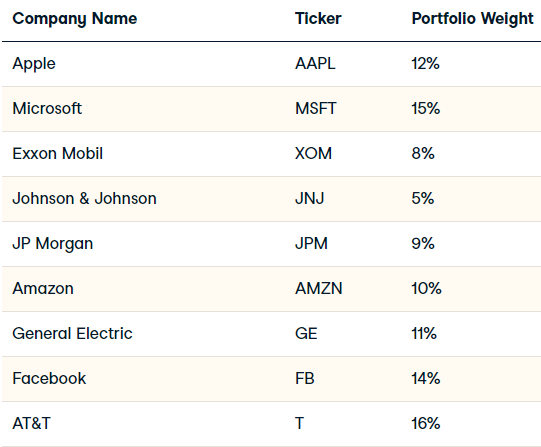

***Note that the portfolio weights should sum to 100% in most cases***

* Use the `.mul()` method to multiply the `portfolio_weights` across the rows of `StockReturns` to get weighted stock returns.
* Then use the `.sum()` method across the rows on the `WeightedReturns` object to calculate the portfolio returns.
* Finally, review the plot of cumulative returns over time.

StockReturns.mul(portfolio_weights, axis=1)


,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.000342,0.001062,0.000558,0.000273,0.000980,0.000507,0.000313,0.002203,0.001843
2017-01-04,-0.000134,-0.000671,-0.000880,-0.000082,0.000166,0.000466,0.000035,0.002192,-0.000930
2017-01-05,0.000610,0.000000,-0.001193,0.000523,-0.000828,0.003073,-0.000625,0.002335,-0.000449
2017-01-06,0.001338,0.001300,-0.000045,-0.000240,0.000010,0.001991,0.000314,0.003179,-0.003188
2017-01-09,0.001099,-0.000477,-0.001320,-0.000009,0.000063,0.000117,-0.000522,0.001690,-0.002014



WeightedReturns.sum(axis=1)


Date
2017-01-03    0.008082
2017-01-04    0.000161
2017-01-05    0.003448
2017-01-06    0.004660
2017-01-09   -0.001372
dtype: float64

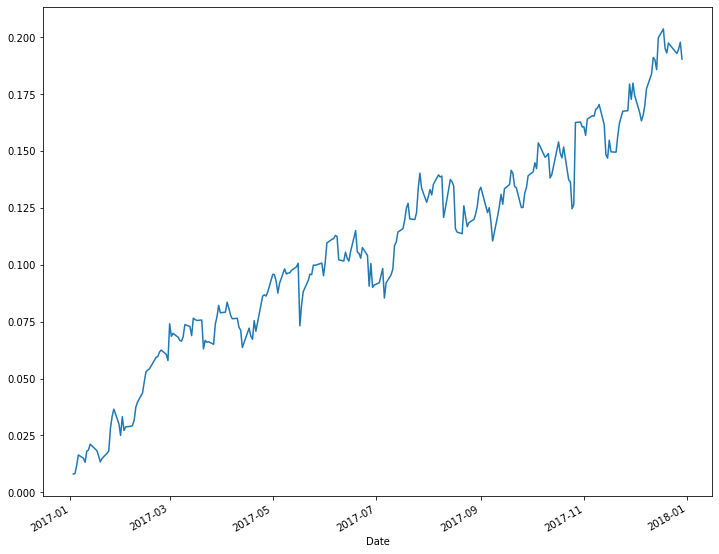

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

StockReturns = pd.read_csv("Big9Returns2017.csv", parse_dates=["Date"], index_col="Date")

# Finish defining the portfolio weights as a numpy array
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

# Calculate the weighted stock returns
WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)

print("StockReturns.mul(portfolio_weights, axis=1)")
display(StockReturns.mul(portfolio_weights, axis=1).head())

# Calculate the portfolio returns
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)
print("\nWeightedReturns.sum(axis=1)")
display(WeightedReturns.sum(axis=1).head())

# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+StockReturns["Portfolio"]).cumprod()-1)
CumulativeReturns.plot(figsize=(12,10))
plt.show()

### **Equal weighted portfolios**

When comparing different portfolios, you often want to consider performance versus a naive equally-weighted portfolio. If the portfolio doesn't outperform a simple equally weighted portfolio, you might want to consider another strategy, or simply opt for the naive approach if all else fails. You can expect equally-weighted portfolios to tend to outperform the market when the largest companies are doing poorly. This is because even tiny companies would have the same weight in your equally-weighted portfolio as Apple or Amazon, for example.

To make it easier for you to visualize the cumulative returns of portfolios, we defined the function `cumulative_returns_plot()` in your workspace.

* Set `numstocks` equal to `9`, which is the number of stocks in your portfolio.
* Use `np.repeat()` to set `portfolio_weights_ew` equal to an array with an equal weights for each of the 9 stocks.
* Use the `.iloc` accessor to select all rows and the first 9 columns when calculating the portfolio return.
* Finally, review the plot of cumulative returns over time.

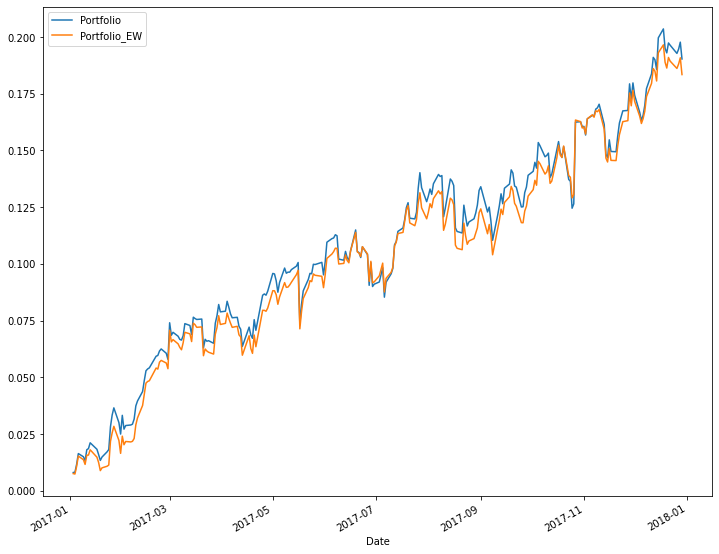

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def cumulative_returns_plot(cols): 
    """
    cols: A list of column names to plot 
    """
    
    CumulativeReturns = ((1+StockReturns[cols]).cumprod()-1) 
    CumulativeReturns.plot(figsize=(12,10)) 
    plt.show()

StockReturns = pd.read_csv("Big9Returns2017.csv", parse_dates=["Date"], index_col="Date")
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])
WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

# How many stocks are in your portfolio?
numstocks = 9

# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)

# Calculate the equally-weighted portfolio returns
StockReturns['Portfolio_EW'] = StockReturns.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)

cumulative_returns_plot(['Portfolio', 'Portfolio_EW'])

### **Market-cap weighted portfolios**

Conversely, when large companies are doing well, market capitalization, or "market cap" weighted portfolios tend to outperform. This is because the largest weights are being assigned to the largest companies, or the companies with the largest market cap.

Below is a table of the market capitalizations of the companies in your portfolio just before January 2017:

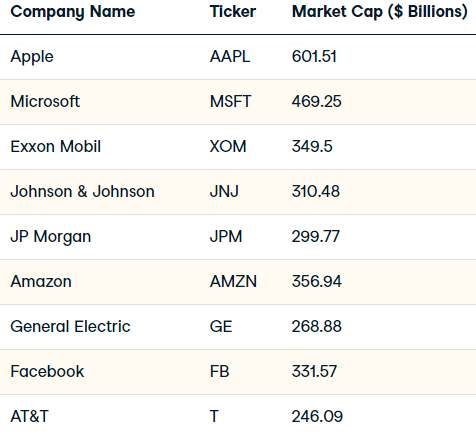

* Calculate `mcap_weights` array such that each element is the ratio of market cap of the company to the total market cap of all companies.
* Use the `.mul()` method on the `mcap_weights` and returns to calculate the market capitalization weighted portfolio returns.
* Finally, review the plot of cumulative returns over time.

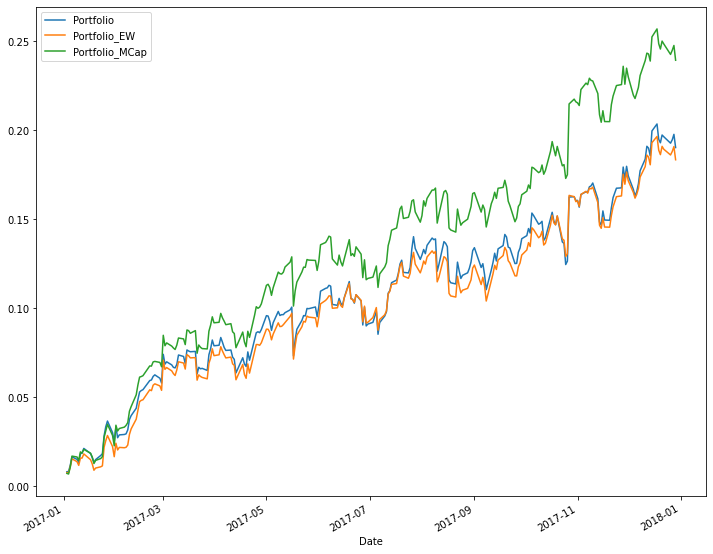

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def cumulative_returns_plot(cols): 
    """
    cols: A list of column names to plot 
    """
    
    CumulativeReturns = ((1+StockReturns[cols]).cumprod()-1) 
    CumulativeReturns.plot(figsize=(12,10)) 
    plt.show()

StockReturns = pd.read_csv("Big9Returns2017.csv", parse_dates=["Date"], index_col="Date")
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])
WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)
numstocks = 9
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)
StockReturns['Portfolio_EW'] = StockReturns.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)

# Create an array of market capitalizations (in billions)
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 	246.09])

# Calculate the market cap weights
mcap_weights = market_capitalizations/sum(market_capitalizations)

# Calculate the market cap weighted portfolio returns
StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)
cumulative_returns_plot(['Portfolio', 'Portfolio_EW', 'Portfolio_MCap'])

### **The correlation matrix**

The correlation matrix can be used to estimate the linear historical relationship between the returns of multiple assets. You can use the built-in `.corr()` method on a pandas DataFrame to easily calculate the correlation matrix.

Correlation ranges from -1 to 1. The diagonal of the correlation matrix is always 1, because a stock always has a perfect correlation with itself. The matrix is symmetric, which means that the lower triangle and upper triangle of the matrix are simply reflections of each other since correlation is a bi-directional measurement.

In this exercise, you will use the `seaborn` library to generate a `heatmap`.

* Calculate the `correlation_matrix` of the `StockReturns` DataFrame.
* Use `seaborn`'s `heatmap`() function to create a heatmap map `correlation_matrix`.

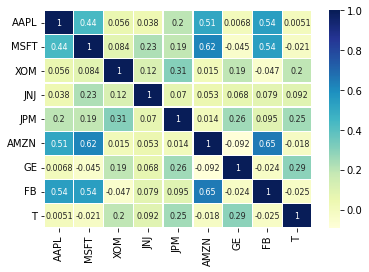

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

StockReturns = pd.read_csv("Big9Returns2017.csv", parse_dates=["Date"], index_col="Date")

# Calculate the correlation matrix
correlation_matrix = StockReturns.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.3, annot_kws={"size": 8})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

### **The co-variance matrix**

You can easily compute the co-variance matrix of a DataFrame of returns using the `.cov()` method.

The correlation matrix doesn't really tell you anything about the variance of the underlying assets, only the linear relationships between assets. The co-variance (a.k.a. variance-covariance) matrix, on the other hand, contains all of this information, and is very useful for portfolio optimization and risk management purposes.

* Calculate the co-variance matrix of the `StockReturns` DataFrame.
* Annualize the co-variance matrix by multiplying it with `252`, the number of trading days in a year.

In [40]:
import pandas as pd

StockReturns = pd.read_csv("Big9Returns2017.csv", parse_dates=["Date"], index_col="Date")

# Calculate the covariance matrix
cov_mat = StockReturns.cov()

# Annualize the co-variance matrix
cov_mat_annual = cov_mat * 252

# Print the annualized co-variance matrix
display(cov_mat_annual)

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
AAPL,0.030996,0.011400,0.001093,0.000774,0.005716,0.018805,0.000236,0.016243,0.000152
MSFT,0.011400,0.021912,0.001392,0.003899,0.004597,0.019275,-0.001315,0.013682,-0.000530
XOM,0.001093,0.001392,0.012500,0.001548,0.005554,0.000354,0.004295,-0.000890,0.003751
JNJ,0.000774,0.003899,0.001548,0.013092,0.001307,0.001266,0.001540,0.001545,0.001780
JPM,0.005716,0.004597,0.005554,0.001307,0.026371,0.000474,0.008283,0.002631,0.006972
AMZN,0.018805,0.019275,0.000354,0.001266,0.000474,0.043954,-0.003830,0.023290,-0.000638
GE,0.000236,-0.001315,0.004295,0.001540,0.008283,-0.003830,0.039270,-0.000821,0.009849
FB,0.016243,0.013682,-0.000890,0.001545,0.002631,0.023290,-0.000821,0.028937,-0.000708
T,0.000152,-0.000530,0.003751,0.001780,0.006972,-0.000638,0.009849,-0.000708,0.028833


### **Portfolio standard deviation**

In order to calculate portfolio volatility, you will need the covariance matrix, the portfolio weights, and knowledge of the transpose operation. The transpose of a `numpy` array can be calculated using the `.T` attribute. The `np.dot()` function is the dot-product of two arrays.

The formula for portfolio volatility is:

$$\sigma_{Portfolio} = \sqrt{w^T\cdot\Sigma\cdot w}$$

* $\sigma_{Portfolio}$: Portfolio volatility
* $\Sigma$: Covariance matrix of returns
* $w$: Portfolio weights ($w^T$ is transposed portfolio weights)
* $\cdot$ The dot-multiplication operator

* Calculate the portfolio volatility assuming you use the `portfolio_weights` by following the formula above.

In [43]:
import pandas as pd
import numpy as np

StockReturns = pd.read_csv("Big9Returns2017.csv", parse_dates=["Date"], index_col="Date")
cov_mat = StockReturns.cov()
cov_mat_annual = cov_mat * 252
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(f"portfolio_volatility = {portfolio_volatility * 100:.2f}%")

portfolio_volatility = 8.93%


# **Sharpe Ratio: Risk Adjusted Return**

$$Sharpe \ Ratio = \frac{R_a - r_f}{\sigma_a}$$

* $S$: Sharpe Ratio
* $R_a$: Asset Return
* $r_f$: Risk-free rate of return
* $\sigma_a$: Asset volatility

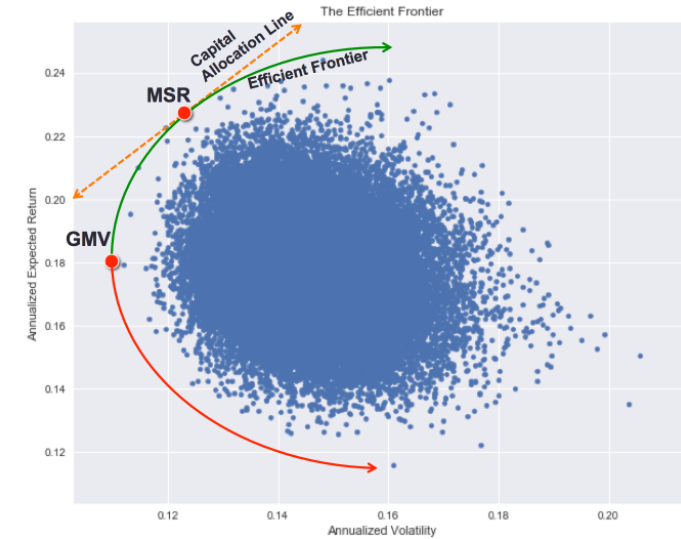

*  Assume `risk_free` rate of `0` for this exercise.
*  Calculate the Sharpe ratio for each asset by subtracting the risk free rate from returns and then dividing by volatility.

In [45]:
import pandas as pd

RandomPortfolios = pd.read_csv("EfficientFrontierPortfoliosSlim.csv")

# Risk free rate
risk_free = 0

# Calculate the Sharpe Ratio for each asset
RandomPortfolios['Sharpe'] = (RandomPortfolios["Returns"] - risk_free)/ RandomPortfolios["Volatility"]

# Print the range of Sharpe ratios
print(RandomPortfolios['Sharpe'].describe()[['min', 'max']])

min    0.742884
max    2.270462
Name: Sharpe, dtype: float64


### **The MSR portfolio**

The maximum Sharpe ratio, or MSR portfolio, which lies at the apex of the efficient frontier, can be constructed by looking for the portfolio with the highest Sharpe ratio.

Unfortunately, the MSR portfolio is often quite erratic. Even though the portfolio had a high historical Sharpe ratio, it doesn't guarantee that the portfolio will have a good Sharpe ratio moving forward.

* Sort `RandomPortfolios` with the highest Sharpe value, ranking in descending order.
* Multiply `MSR_weights_array` across the rows of `StockReturns` to get weighted stock returns.
* Finally, review the plot of cumulative returns over time.

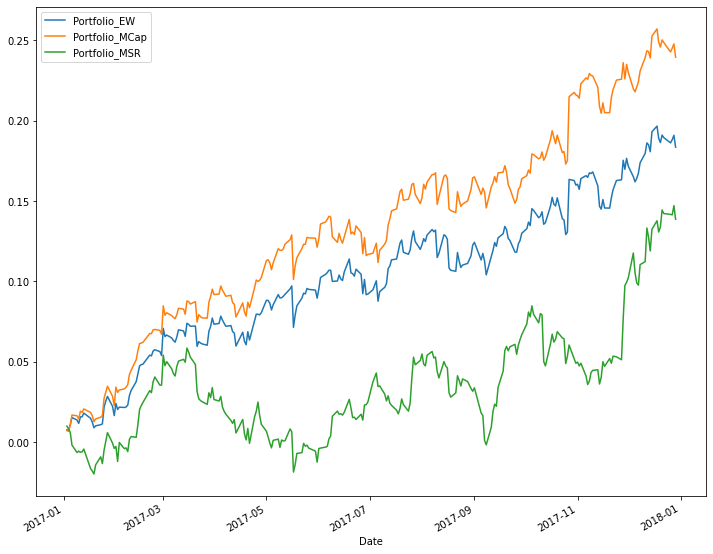

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def cumulative_returns_plot(cols): 
    """
    cols: A list of column names to plot 
    """
    
    CumulativeReturns = ((1+StockReturns[cols]).cumprod()-1) 
    CumulativeReturns.plot(figsize=(12,10)) 
    plt.show()

StockReturns = pd.read_csv("Big9Returns2017.csv", parse_dates=["Date"], index_col="Date")
RandomPortfolios = pd.read_csv("EfficientFrontierPortfoliosSlim.csv")
numstocks = 9
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)
StockReturns['Portfolio_EW'] = StockReturns.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 	246.09])
mcap_weights = market_capitalizations/sum(market_capitalizations)
StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)
risk_free = 0
RandomPortfolios['Sharpe'] = (RandomPortfolios["Returns"] - risk_free)/ RandomPortfolios["Volatility"]

# Sort the portfolios by Sharpe ratio
sorted_portfolios = RandomPortfolios.sort_values(by=['Sharpe'], ascending=False)

# Extract the corresponding weights
MSR_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the MSR weights as a numpy array
MSR_weights_array = np.array(MSR_weights)

# Calculate the MSR portfolio returns
StockReturns['Portfolio_MSR'] = StockReturns.iloc[:, 0:numstocks].mul(MSR_weights_array, axis=1).sum(axis=1)

# Plot the cumulative returns
cumulative_returns_plot(['Portfolio_EW', 'Portfolio_MCap', 'Portfolio_MSR'])

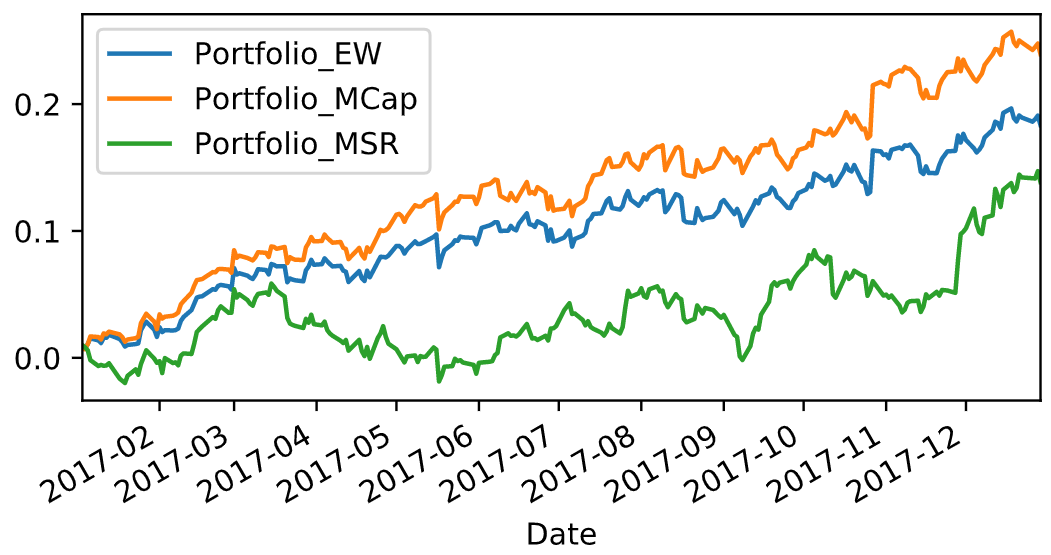

น่าแปลกที่ MSR ได้ผลตอบแทนห่วยสุด ?

### **The GMV portfolio**

The global minimum volatility portfolio, or GMV portfolio, is the portfolio with the lowest standard deviation (risk) and the highest return for the given risk level.

Returns are very hard to predict, but volatilities and correlations tend to be more stable over time. This means that the ***GMV portfolio often outperforms the MSR portfolios*** out of sample even though the MSR would outperform quite significantly in-sample. Of course, out of sample results are what really matters in finance.

* Sort RandomPortfolios with the lowest volatility value, ranking in ascending order.
* Multiply `GMV_weights_array` across the rows of `StockReturns` to get weighted stock returns.
* Finally, review the plot of cumulative returns over time.

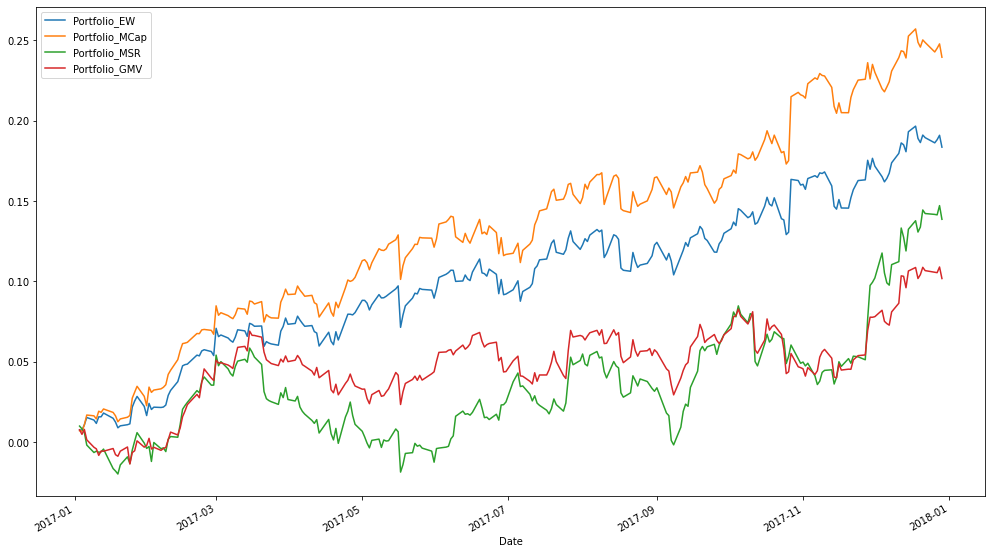

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def cumulative_returns_plot(cols): 
    """
    cols: A list of column names to plot 
    """
    
    CumulativeReturns = ((1+StockReturns[cols]).cumprod()-1) 
    CumulativeReturns.plot(figsize=(17,10)) 
    plt.show()

StockReturns = pd.read_csv("Big9Returns2017.csv", parse_dates=["Date"], index_col="Date")
RandomPortfolios = pd.read_csv("EfficientFrontierPortfoliosSlim.csv")
numstocks = 9
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)
StockReturns['Portfolio_EW'] = StockReturns.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 	246.09])
mcap_weights = market_capitalizations/sum(market_capitalizations)
StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)
risk_free = 0
RandomPortfolios['Sharpe'] = (RandomPortfolios["Returns"] - risk_free)/ RandomPortfolios["Volatility"]
sorted_portfolios = RandomPortfolios.sort_values(by=['Sharpe'], ascending=False)
MSR_weights = sorted_portfolios.iloc[0, 0:numstocks]
MSR_weights_array = np.array(MSR_weights)
StockReturns['Portfolio_MSR'] = StockReturns.iloc[:, 0:numstocks].mul(MSR_weights_array, axis=1).sum(axis=1)

# Sort the portfolios by volatility
sorted_portfolios = RandomPortfolios.sort_values(by=['Volatility'], ascending=True)

# Extract the corresponding weights
GMV_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the GMV weights as a numpy array
GMV_weights_array = np.array(GMV_weights)

# Calculate the GMV portfolio returns
StockReturns['Portfolio_GMV'] = StockReturns.iloc[:, 0:numstocks].mul(GMV_weights_array, axis=1).sum(axis=1)

# Plot the cumulative returns
cumulative_returns_plot(['Portfolio_EW', 'Portfolio_MCap', 'Portfolio_MSR', 'Portfolio_GMV'])

ภาพแตกต่างจากในแบบฝึกหัดนิดหน่อย เพราะเขาไปใช้ `MSR_weights_array` ที่ต่างกับที่เราใช้

# **Excess Return = Return - Risk Free Return**

# **The Capital Asset Pricing Model**

$$E(R_P) - RF = \beta_P(E(R_B)-RF)$$

* $E(R_P) - RF$: The excess expected return of a stock or portfolio $P$
* $E(R_M)-RF$: The excess expected return of the broad
market portfolio $B$
* $R_F$: The regional risk free-rate
* $\beta_P$: Portfolio beta, or exposure, to the broad market portfolio $B$

## **Calculating Beta using co-variance**

$$ \beta_P = \frac{Cov(R_P, R_B)}{Var(R_B)}$$

```
covariance_matrix = Data[["Port_Excess","Mkt_Excess"]].cov()
covariance_coefficient = covariance_matrix.iloc[0, 1]
benchmark_variance = Data["Mkt_Excess"].var()
portfolio_beta = covariance_coefficient / benchmark_variance
```

## **Calculating Beta using linear regression**

Assuming you already have excess portfolio and market returns in the object `Data`:

```
import statsmodels.formula.api as smf
model = smf.ols(formula='Port_Excess ~ Mkt_Excess', data=Data)
fit = model.fit()
beta = fit.params["Mkt_Excess"]
```
### **Excess returns**

In order to perform a robust analysis on your portfolio returns, you must ***first subtract the risk-free rate of return from your portfolio returns***. The portfolio return minus the risk-free rate of return is known as the ***<ins>Excess Portfolio Return</ins>***.

In the United States, the risk-free rate has been close to 0 since the financial crisis (2008), but this step is crucial for other countries with higher risk-free rates such as Venezuela or Brazil.

The `FamaFrenchData` DataFrame is available in your workspace and contains the proper data for this exercise. The portfolio you will be working with is the equal-weighted portfolio from Chapter 2.

* Calculate excess portfolio returns by subtracting the risk free (`'RF'`) column from the `'Portfolio'` column in `FamaFrenchData`.
* Review the plot of returns and excessive returns.

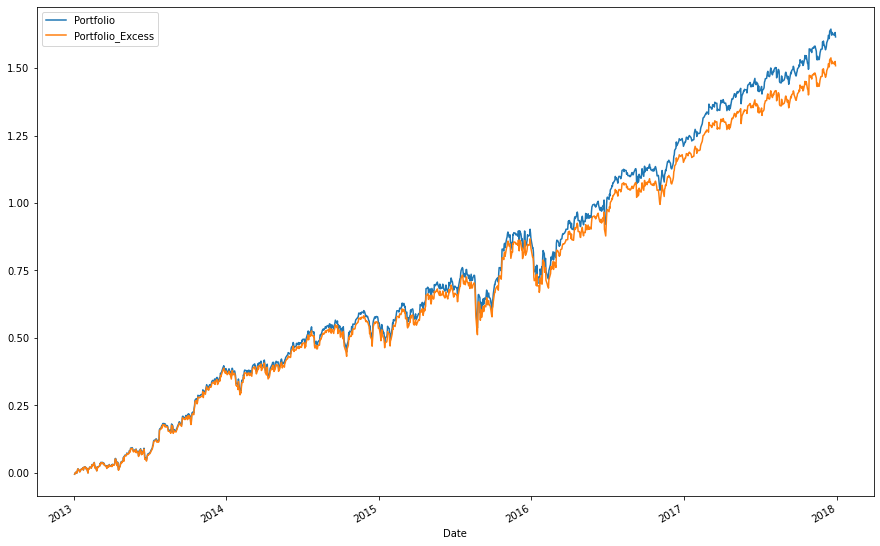

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

FamaFrenchData = pd.read_csv("Fama.csv", parse_dates=["Date"], index_col="Date")

# Calculate excess portfolio returns
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']

# Plot returns vs excess returns
CumulativeReturns = ((1+FamaFrenchData[['Portfolio','Portfolio_Excess']]).cumprod()-1)
CumulativeReturns.plot(figsize=(15, 10))
plt.show()

Notice how the excess return is only slightly less? That's because the risk free rate has been so low!

### **Calculating beta using co-variance**

Beta is an essential component of many financial models, and is a measure of systematic risk, or exposure to the broad market. In the CAPM model, beta is one of two essential factors.

Historical beta can be estimated in a number of ways. In this exercise, you will use the following simple formula involving co-variance and variance to a benchmark market portfolio:

$$\beta_P = \frac{Cov(R_P, R_B)}{Var(R_B)}$$

* $\beta_P$ : Portfolio beta
* $Cov(R_P, R_B)$: The co-variance between the portfolio ($P$) and the benchmark market index ($B$)
* $Var(R_B)$: The variance of the benchmark market index

The `FamaFrenchData` DataFrame is available in your workspace and contains the proper data for this exercise.

* Generate a co-variance matrix between `'Portfolio_Excess'` and `'Market_Excess'` columns.
* Calculate the variance of `'Market_Excess'` column.
* Calculate the portfolio beta.

In [14]:
import pandas as pd

FamaFrenchData = pd.read_csv("FamaFrenchFactors.csv", parse_dates=["Date"], index_col="Date")
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']

# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()

# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
print(covariance_coefficient)

# Calculate the benchmark variance
benchmark_variance = FamaFrenchData['Market_Excess'].var()
print(benchmark_variance)

# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient / benchmark_variance
print(f"The portfolio β is {portfolio_beta:.2f}.")

5.7261263381549724e-05
5.8803350882118946e-05
The portfolio β is 0.97.


For every 1.0% rise (or fall) in the market, you can expect your portfolio to rise (fall) roughly 0.97%.

### **Calculating beta with CAPM**

There are many ways to model stock returns, but the **Capital Asset Pricing Model**, or CAPM, is one the most well known:

$$E(R_P) - RF = \beta_P(E(R_M)-RF)$$

* $E(R_P) - RF$ : The excess expected return of a stock or portfolio P
* $E(R_M)-RF$: The excess expected return of the broad market portfolio B
* $RF$: The regional risk free-rate
* $\beta_P$: Portfolio beta, or exposure, to the broad market portfolio B

You can call the `.fit()` method from `statsmodels.formula.api` on an `.ols(formula, data)` model object to perform the analysis, and the `.summary()` method on the analysis object to anaylze the results.

The `FamaFrenchData` DataFrame is available in your workspace and contains the proper data for this exercise.

* Define a regression model that explains `Portfolio_Excess` as a function of `Market_Excess`.
* Extract and print the adjusted r-squared of the fitted regression model.
* Extract the market beta of your portfolio.

In [18]:
import pandas as pd
import statsmodels.formula.api as smf

FamaFrenchData = pd.read_csv("FamaFrenchFactors.csv", parse_dates=["Date"], index_col="Date")
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']

# Define the regression formula
CAPM_model = smf.ols(formula="Portfolio_Excess ~ Market_Excess", data=FamaFrenchData)

# Print adjusted r-squared of the fitted regression
CAPM_fit = CAPM_model.fit()
print(f"Adjusted R-squared is {CAPM_fit.rsquared_adj:.2f}.")

# Extract the beta
regression_beta = CAPM_fit.params["Market_Excess"]
print(f"Regression β is {regression_beta:.2f}.")

Adjusted R-squared is 0.79.
Regression β is 0.97.


# **The Fama-French 3 factor Model**

One of the most widely used model in portfolio management.

$$R_P = RF + \beta_M(R_M-RF) + b_{SMB}\cdot SMB + b_{HML}\cdot HML + \alpha$$

* $SMB$: The small minus big factor (ส่วนใหญ่ ผลตอบแทนจาก small มักจะสูงกว่า big เพื่อจูงใจให้คนมาลงทุน)
  * $b_{SMB}$: Exposure to the SMB factor  
* $HML$: The high minus low factor (มีการเปลี่ยนแปลงตามวัฎจักรเศรษฐกิจ)
  * $b_{HML}$: Exposure to the HML factor
* $\alpha$: Performance which is unexplained by any other factors
* $\beta_M$: Beta to the broad market portfolio B

=======================================================

* Define a regression model that explains `Portfolio_Excess` as a function of `Market_Excess`, `SMB`, and `HML`.
* Extract the adjusted r-squared value from `FamaFrench_fit`.



In [2]:
import pandas as pd
import statsmodels.formula.api as smf

FamaFrenchData = pd.read_csv("FamaFrenchFactors.csv", parse_dates=["Date"], index_col="Date")
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']

# Define the regression formula
FamaFrench_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML', data=FamaFrenchData)

# Fit the regression
FamaFrench_fit = FamaFrench_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench_fit.rsquared_adj
print(f"Adjusted R-squared: {regression_adj_rsq:.2f}")


Adjusted R-squared: 0.82


### **p-values and coefficients**

You can use the `.pvalues` attribute on a fitted `smf.ols` regression model to retrieve the p-values for each coefficient.

Normally, p-values less than 0.05 are considered statistically significant.

Coefficients can be extracted from the fitted regression object using the `.params` attribute.

In this example, a statistically significant negative `SMB` ('Small Minus Big') coefficient would signify a factor exposure to large cap stocks, i.e., negative exposure to small-cap stocks means positive exposure to large caps.  A positive coefficient would signify an exposure to small cap stocks.

* Extract the p-value for `'SMB'`.
* Extract the regression coefficient for `'SMB'`.

In [3]:
import pandas as pd
import statsmodels.formula.api as smf

FamaFrenchData = pd.read_csv("FamaFrenchFactors.csv", parse_dates=["Date"], index_col="Date")
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']
FamaFrench_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML', data=FamaFrenchData)
FamaFrench_fit = FamaFrench_model.fit()

# Extract the p-value of the SMB factor
smb_pval = FamaFrench_fit.pvalues['SMB']

# If the p-value is significant, print significant
if smb_pval < 0.05:
    significant_msg = 'significant'
else:
    significant_msg = 'not significant'

# Print the SMB coefficient
smb_coeff = FamaFrench_fit.params['SMB']
print("The SMB coefficient is ", smb_coeff, " and is ", significant_msg)

The SMB coefficient is  -0.26215152743192677  and is  significant


### **Economic intuition in factor modeling**

Finance is all about risk and return. Higher risk tends to lead to higher returns over time, and lower risk portfolios tend to lead to lower returns over time.

In the Fama-French factor model:

* The **HML** factor is constructed by calculating the return of **growth** stocks, or stocks with high valuations, versus the return of **value** stocks.
* The **SMB** factor is constructed by calculating the return of **small-cap** stocks, or stocks with small market capitalizations, versus the return of **large-cap** stocks.

What would you expect to be historically true about t

* Small-cap + Value stocks should have the highest returns and risk.

### **The efficient market and alpha**

The alpha ($\alpha$) left over by the regression is unexplained performance due to unknown factors. In a regression model, this is simply the coefficient of the ***intercept***.

There are two general schools of thought as to why:

The model simply needs to be expanded. When you have found all of the missing economic factors, you can explain all stock and portfolio returns. This is known as the Efficient Market Hypothesis.

There is a degree of unexplainable performance that no model will ever capture reliably. Perhaps it is due to skill, timing, intuition or luck, but ***investors should seek to maximize their alpha***.

* Extract the coefficient of your intercept and assign it to `portfolio_alpha`.
* Annualize your `portfolio_alpha` return by assuming `252` trading days in a year.

In [6]:
import pandas as pd
import statsmodels.formula.api as smf

FamaFrenchData = pd.read_csv("FamaFrenchFactors.csv", parse_dates=["Date"], index_col="Date")
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']
FamaFrench_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML', data=FamaFrenchData)
FamaFrench_fit = FamaFrench_model.fit()

# Calculate your portfolio alpha
portfolio_alpha = FamaFrench_fit.params["Intercept"]
print(portfolio_alpha)

# Annualize your portfolio alpha
portfolio_alpha_annualized = (1 + portfolio_alpha)**252 - 1
print(f"Annualized portfolio alpha is {portfolio_alpha_annualized*100:.2f}%")

0.0001832666520318351
Annualized portfolio alpha is 4.73%


# **The Fama-French 5 factor model**

In 2015, Fama and French extended their previous 3-factor
model, adding two additional factors:

* **RMW**: The returns of companies with high
operating profitability versus those with low operating
profitability.
* **CMA**: The returns of companies with
aggressive investments versus those who are more conservative

* Use what you've learned from the previous exercises to define the `FamaFrench5_model` regression model for `Portfolio_Excess` against the original 3 Fama-French factors (`Market_Excess`, `SMB`, `HML`) in addition to the two new factors (`RMW`, `CMA`).
* Fit the regression model and store the results in `FamaFrench5_fit`.
* Extract the adjusted r-squared value and assign it to `regression_adj_rsq`.

In [7]:
import pandas as pd
import statsmodels.formula.api as smf 

FamaFrenchData = pd.read_csv("FamaFrenchFactors.csv", parse_dates=["Date"], index_col="Date")
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']

# Define the regression formula
FamaFrench5_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML + RMW + CMA', data=FamaFrenchData)

# Fit the regression
FamaFrench5_fit = FamaFrench5_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench5_fit.rsquared_adj
print(regression_adj_rsq)

0.8367245019225789


# **Estimating tail risk**

**Tail risk** is the risk of extreme investment outcomes, most
notably on the <ins>negative</ins> side of a distribution.

# **Historical drawdown**

Drawdown is the percentage
loss from the highest
cumulative historical point.  How far has the stock fallen from its best point in history?

$$\text{Draw Down} = \frac{r_t}{RM}-1$$

* $r_t$ is the cumulative return at time $t$
* $RM$ is the running maximum.

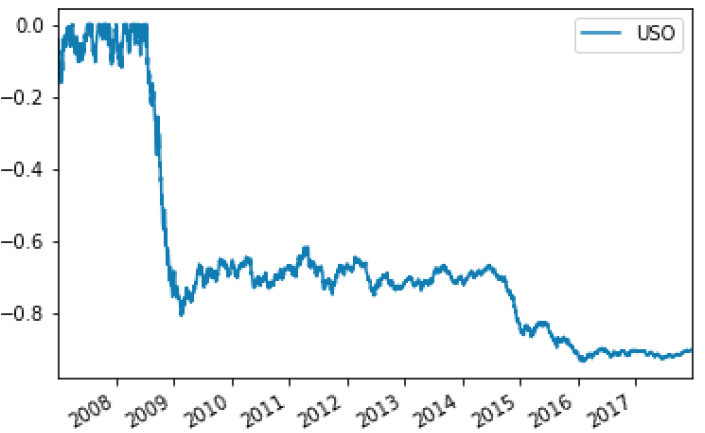

# **Historical Value at Risk**

Value at Risk, or VaR, is a
threshold with a given
con,dence level that losses
will not (or more accurately,
will not historically) exceed a
certain level.

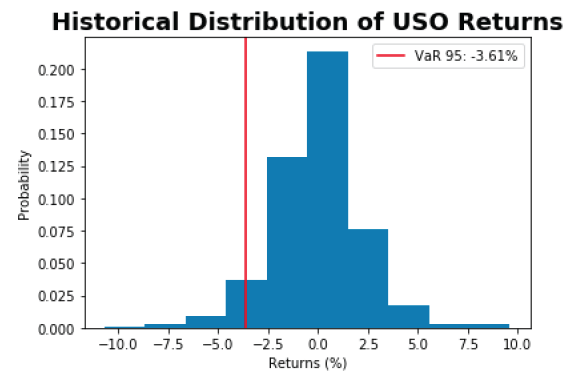


95% certain that losses will
not exceed -2.3% in a given
day based on historical values



# **Historical expected shortfall**

Conditional Value at Risk, or
**CVaR**, is an estimate of
expected losses sustained in
the worst 1 - x% of scenarios.


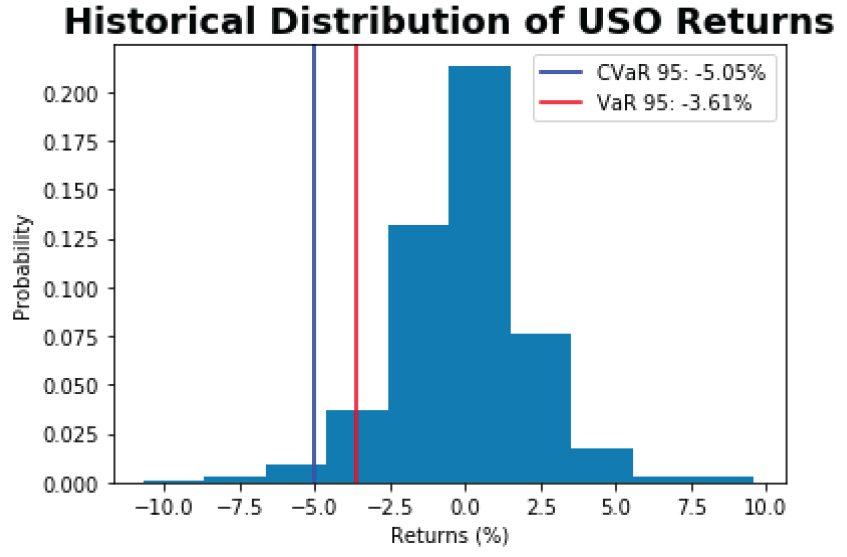

In the worst 5% of cases,
losses were on average
exceed -2.5% historically.

### **Historical drawdown**

The stock market tends to rise over time, but that doesn't mean that you won't have periods of drawdown.

Drawdown can be measured as the percentage loss from the highest cumulative historical point.

In Python, you can use the `.accumulate()` and `.maximum()` functions to calculate the running maximum, and the simple formula below to calculate drawdown:

$$\text{Drawdown} = \frac{r_t}{RM}-1$$

$r_t$: Cumulative return at time $t$
$RM$: Running maximum

The cumulative returns of USO, an ETF that tracks oil prices, is available in the variable `cum_rets`.


* Calculate the running maximum of the cumulative returns of the USO oil ETF (`cum_rets`) using `np.maximum.accumulate()`.
* Where the running maximum (`running_max`) drops below `1`, set the running maximum equal to `1`.
* Calculate drawdown using the simple formula above with the `cum_rets` and `running_max`.
* Review the plot.

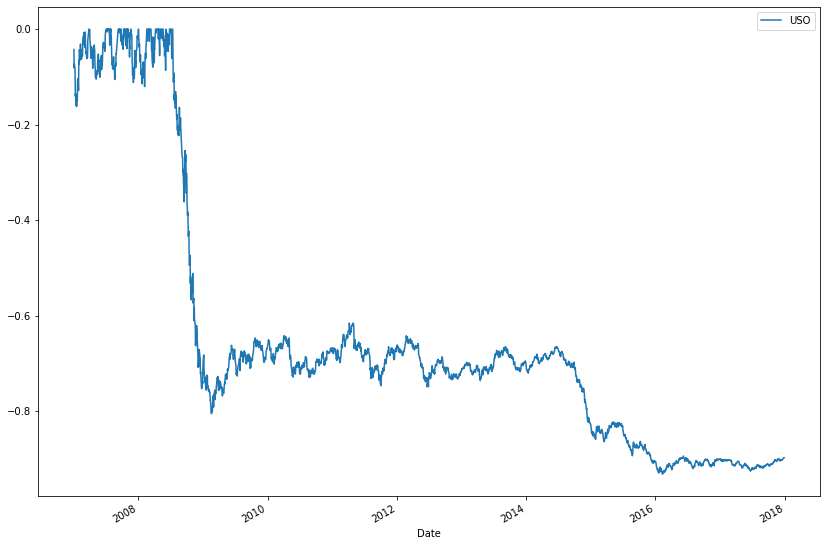

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cum_rets = pd.read_csv("USO_2.csv", parse_dates=["Date"], index_col="Date")

# Calculate the running maximum
running_max = np.maximum.accumulate(cum_rets)

# Ensure the value never drops below 1
running_max[running_max < 1] = 1

# Calculate the percentage drawdown
drawdown = cum_rets/running_max - 1

# Plot the results
drawdown.plot(figsize=(14, 10))
plt.show()

Notice how the drawdown never goes above 0.

### **Historical value at risk**

Drawdown is a measure of sustained losses over time, but what about simple single-day movements?

**Value at Risk**, often referred to as **VaR**, is a way to estimate the risk of a single day negative price movement. VaR can be measured for any given probability, or confidence level, but the ***most commonly quoted tend to be VaR(95)*** and ***VaR(99)***. Historical VaR is the simplest method to calculate VaR, but relies on historical returns data which may not be a good assumption of the future. Historical VaR(95), for example, represents the minimum loss that your portfolio or asset has sustained in the worst 5% of cases.

Below, you will calculate the historical VaR(95) of the USO oil ETF. Returns data is available (in percent) in the variable `StockReturns_perc`.

* Calculate VaR(95), the worst 5% of USO returns (`StockReturns_perc`), and assign it to `var_95`.
* Sort `StockReturns_perc` and assign it to `sorted_rets`.
* Plot the histogram of sorted returns (`sorted_rets`).

Historical VaR(95) = -3.61%.


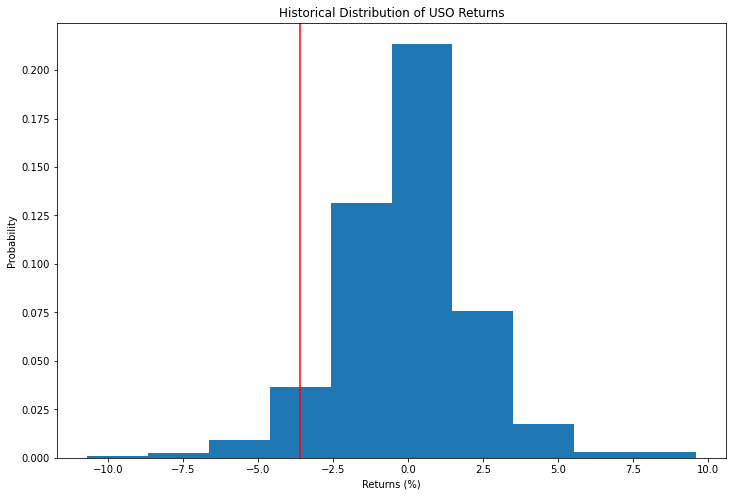

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

USO = pd.read_csv("USO.csv", parse_dates=["Date"], index_col="Date").mul(100)
StockReturns_perc = pd.Series(USO["USO"].values, index=USO.index)

# Calculate historical VaR(95)
var_95 = np.percentile(StockReturns_perc, 5)
print(f"Historical VaR(95) = {var_95:.2f}%.")

# Sort the returns for plotting
sorted_rets = StockReturns_perc.sort_values()

# Plot the probability of each sorted return quantile
figure(figsize=(12,8))
plt.hist(sorted_rets, density=True)

# Denote the VaR 95 quantile
plt.axvline(x=var_95, color='r', linestyle='-', label="VaR 95: {0:.2f}%".format(var_95))
plt.xlabel("Returns (%)")
plt.ylabel("Probability")
plt.title("Historical Distribution of USO Returns")
plt.show()

### **Historical expected shortfall**

**Expected Shortfall**, otherwise known as **CVaR**, or conditional value at risk, is simply the expected loss of the worst case scenarios of returns.

For example, if your portfolio has a VaR(95) of -3%, then the CVaR(95) would be the average value of all losses exceeding -3%.

Returns data is available (in percent) in the variable `StockReturns_perc`. `var_95` from the above exercise is also available in your workspace.

* Calculate the average of returns in `StockReturns_perc` where `StockReturns_perc` is less than or equal to `var_95` and assign it to `cvar_95`.
* Plot the histogram of sorted returns (`sorted_rets`) using the `plt.hist()` function.

cvar(95) =  -5.05%


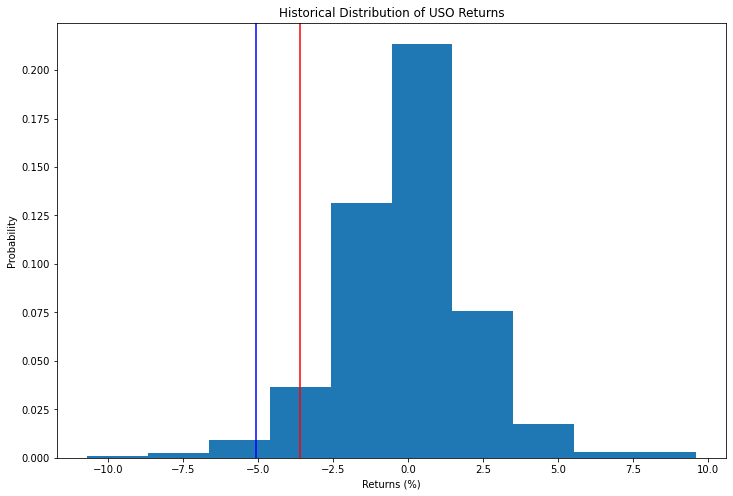

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

USO = pd.read_csv("USO.csv", parse_dates=["Date"], index_col="Date").mul(100)
StockReturns_perc = pd.Series(USO["USO"].values, index=USO.index)
var_95 = np.percentile(StockReturns_perc, 5)

# Historical CVaR 95
cvar_95 = StockReturns_perc[StockReturns_perc <= var_95].mean()
print(f"cvar(95) =  {cvar_95:.2f}%")

# Sort the returns for plotting
sorted_rets = sorted(StockReturns_perc)

# Plot the probability of each return quantile
figure(figsize=(12,8))
plt.hist(sorted_rets, density=True)

# Denote the VaR 95 and CVaR 95 quantiles
plt.axvline(x=var_95, color="r", linestyle="-", label='VaR 95: {0:.2f}%'.format(var_95))
plt.axvline(x=cvar_95, color='b', linestyle='-', label='CVaR 95: {0:.2f}%'.format(cvar_95))
plt.xlabel("Returns (%)")
plt.ylabel("Probability")
plt.title("Historical Distribution of USO Returns")
plt.show()


# **Parametric VaR in Python**

Assuming you have an object `StockReturns` which is a time
series of stock returns.

To calculate parametric VaR(95):

```
μ = np.mean(StockReturns)
σ = np.std(StockReturns)
confidence_level = 0.05
VaR = norm.ppf(confidence_level, μ, σ)
```
# **Scaling risk in Python**

Assuming you have a one-day estimate of VaR(95) `var_95`.
To estimate 5-day VaR(95):

```
forecast_days = 5
forecast_var95_5day = var_95*np.sqrt(forecast_days)
```

### **Changing VaR and CVaR quantiles**

**VaR** quantiles often used are 90%, 95%, and 99%, corresponding to the worst 10%, 5%, and 1% of cases respectively. These same quantiles are also often used for **CVaR**. Note that **CVaR** will always be a more extreme estimate when compared with **VaR** for the same quantile.

Compare the **VaR** vs **CVaR** values for USO ETF returns below.

Returns data is available (in percent) in `StockReturns_perc`. We also calculated `var_95`, `cvar_95`, `var_99`, `cvar_99` and defined a function `plot_hist()` that compares several quantiles for you.

* Calculate the VaR(90) for `StockReturns_perc` and save the result in `var_90`.
* Calculate the CVaR(90) for `StockReturns_perc` and save the result in `cvar_90`.


-2.558512646965176
-4.04318677051881


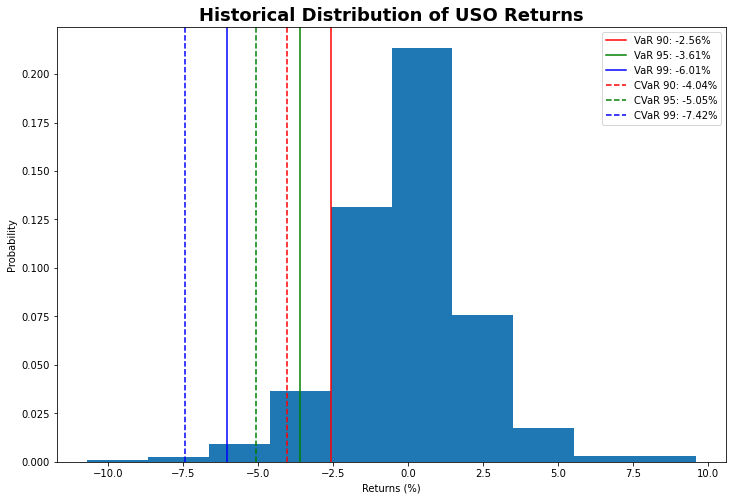

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def plot_hist():
    figure(figsize=(12,8))
    plt.hist(sorted_rets, density=True)
    # Charting parameters
    plt.xlabel('Returns (%)')
    plt.ylabel('Probability')
    plt.title('Historical Distribution of USO Returns', fontsize=18, fontweight='bold')
    plt.axvline(x=var_90, color='r', linestyle='-', label="VaR 90: {0:.2f}%".format(var_90))
    plt.axvline(x=var_95, color='g', linestyle='-', label="VaR 95: {0:.2f}%".format(var_95))
    plt.axvline(x=var_99, color='b', linestyle='-', label="VaR 99: {0:.2f}%".format(var_99))
    plt.axvline(x=cvar_90, color='r', linestyle='--', label="CVaR 90: {0:.2f}%".format(cvar_90))
    plt.axvline(x=cvar_95, color='g', linestyle='--', label="CVaR 95: {0:.2f}%".format(cvar_95))
    plt.axvline(x=cvar_99, color='b', linestyle='--', label="CVaR 99: {0:.2f}%".format(cvar_99))
    plt.legend(loc='upper right')
    plt.show()

USO = pd.read_csv("USO.csv", parse_dates=["Date"], index_col="Date").mul(100)
StockReturns_perc = pd.Series(USO["USO"].values, index=USO.index)
sorted_rets = StockReturns_perc.sort_values()

# Historical VaR(90) quantiles
var_90 = np.percentile(StockReturns_perc, 10)
var_95 = np.percentile(StockReturns_perc, 5)
var_99 = np.percentile(StockReturns_perc, 1)
print(var_90)

# Historical CVaR(90) quantiles
cvar_90 = StockReturns_perc[StockReturns_perc < var_90].mean()
cvar_95 = StockReturns_perc[StockReturns_perc < var_95].mean()
cvar_99 = StockReturns_perc[StockReturns_perc < var_99].mean()
print(cvar_90)

# Plot to compare
plot_hist()

### **Parametric VaR**

Value at Risk can also be computed parametrically using a method known as variance/co-variance VaR. This method allows you to simulate a range of possibilities based on historical return distribution properties rather than actual return values. You can calculate the parametric VaR(90) using:

```
# Import norm from scipy.stats
from scipy.stats import norm

# Calculate Parametric VaR
norm.ppf(confidence_level, μ, σ)
```

where $\mu$ and $\sigma$ are the mean and volatility, respectively.

Returns data is available (in decimals) in the variable `StockReturns`.


* Calculate the mean and volatility of `StockReturns` and assign them to $\mu$ and $\sigma$, respectively.
* Set the `confidence_level` for VaR(95).
* Calculate VaR(95) using the `norm.ppf()` function, passing in the confidence level as the first parameter, with $\mu$ and $\sigma$ as the second and third parameters.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

USO = pd.read_csv("USO.csv", parse_dates=["Date"], index_col="Date")
StockReturns = pd.Series(USO["USO"].values, index=USO.index)

# Estimate the average daily return
μ = np.mean(StockReturns)

# Estimate the daily volatility
σ = np.std(StockReturns)

# Set the VaR confidence level
confidence_level = 0.05

# Calculate Parametric VaR
var_95 = norm.ppf(confidence_level, μ, σ)
print('Mean: ', str(μ), '\nVolatility: ', str(σ), '\nThe parametric VaR(95) is ', str(100*var_95),'%')

Mean:  -0.00028638956240214754 
Volatility:  0.021888087129708873 
The parametric VaR(95) is  -3.6289089064733644 %


### **Scaling risk estimates**

The VaR(95) number calculated in previous exercises is simply the value at risk for a single day. To estimate the VaR for a longer time horizon, ***scale the value by the square root of time***, similar to scaling volatility:


`StockReturns_perc` and `var_95` from the previous exercise is available in your workspace. Use this data to estimate the VaR for the USO oil ETF for `1` to `100` days from now. We've also defined a function `plot_var_scale()` that plots the VaR for `1` to `100` days from now.

* Loop from `0` to `100` (not including 100) using the `range()` function.
* Set the second column of `forecasted_values` at each index equal to the forecasted VaR, multiplying `var_95` by the square root of i + 1 using the `np.sqrt()` function.

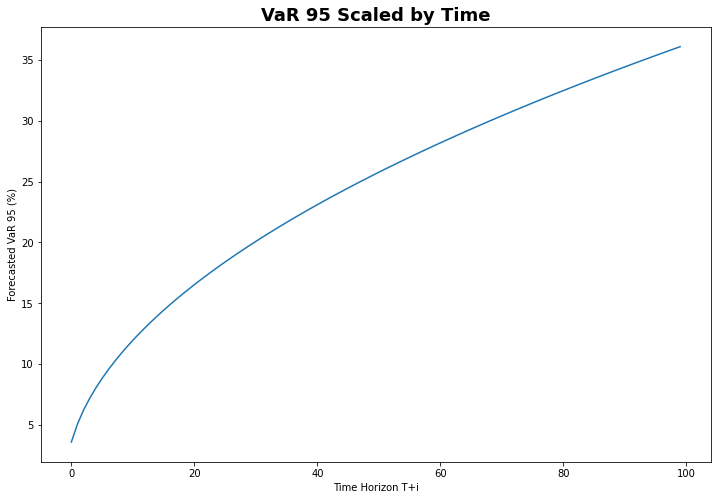

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def plot_var_scale():
    # Plot the forecased vs time
    figure(figsize=(12, 8))
    plt.plot(forecasted_values[:,0], -1*forecasted_values[:,1])
    plt.xlabel('Time Horizon T+i')
    plt.ylabel('Forecasted VaR 95 (%)')
    plt.title('VaR 95 Scaled by Time', fontsize=18, fontweight='bold')
    plt.show()

USO = pd.read_csv("USO.csv", parse_dates=["Date"], index_col="Date").mul(100)
StockReturns_perc = pd.Series(USO["USO"].values, index=USO.index)
var_95 = np.percentile(StockReturns_perc, 5)

# Aggregate forecasted VaR
forecasted_values = np.empty([100, 2])

# Loop through each forecast period
for i in range(100):
    # Save the time horizon i
    forecasted_values[i, 0] = i
    # Save the forecasted VaR 95
    forecasted_values[i, 1] = var_95 * np.sqrt(i + 1)
    
# Plot the results
plot_var_scale()

# **Random walks in Python**

Assuming you have an object StockReturns which is a time
series of stock returns.

To simulate a random walk:

```
μ = np.mean(StockReturns)
σ = np.std(StockReturns)
T = 252
S0 = 10
rand_rets = np.random.normal(μ, σ, T) + 1
forecasted_values = S0 * (rand_rets.cumprod())
```

`S0` is the starting stock price.

# **Monte Carlo simulations**

A series of Monte Carlo simulations of a single asset starting at
stock price $10 at T0. Forecasted for 1 year (252 trading days
along the x-axis):

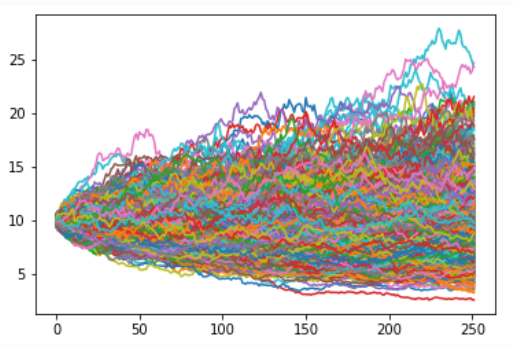

Since one random simulation won't suffice for an accurate estimate of anything, you can repeat the simulation hundreds, thousands, or even millions of times to create a massive range of possible outcomes - a Monte Carlo simulation.


# **Monte Carlo VaR in Python**

To calculate the **VaR(95)** of 100 Monte Carlo simulations:

```
μ = 0.0005
σ = 0.001
T = 252
sim_returns = []
for i in range(100):
    rand_rets = np.random.normal(μ, σ, T)
    sim_returns.append(rand_rets)
var_95 = np.percentile(sim_returns, 5)
```

### **A random walk simulation**

Stochastic or random movements are used in finance to describe stock market movements.

Use the `np.random.normal()` function to model random walk movements of the USO oil ETF with a constant daily average return ($\mu$) and average daily volatility ($\sigma$) over the course of $T$ trading days.

* Set the number of simulated days (`T`) equal to `252`, and the initial stock price (`S0`) equal to `10`.
* Calculate `T` random normal values using `np.random.normal()`, passing in `μ` and `σ`, and `T` as parameters, then adding `1` to the values and assign it to `rand_rets`.
* Calculate the random walk by multiplying `rand_rets.cumprod()` by the initial stock price and assign it to `forecasted_values`.

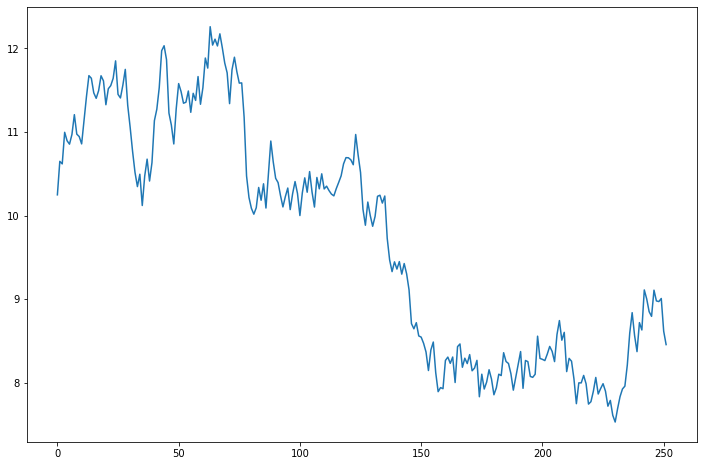

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

USO = pd.read_csv("USO.csv", parse_dates=["Date"], index_col="Date")
StockReturns = pd.Series(USO["USO"].values, index=USO.index)

# Set the simulation parameters
μ = np.mean(StockReturns)
σ = np.std(StockReturns)
T = 252
S0 = 10

# Add one to the random returns
rand_rets = np.random.normal(μ, σ, T) + 1

# Forecasted random walk
forecasted_values = S0 * rand_rets.cumprod()

# Plot the random walk
figure(figsize=(12, 8))
plt.plot(range(0, T), forecasted_values)
plt.show()

### **Monte Carlo simulations**

Monte-Carlo simulations are used to model a wide range of possibilities.

Monte-Carlos can be constructed in many different ways, but all of them involve generating a large number of random variants of a given model, allowing a wide distribution of possible paths to be analyzed. This can allow you to build a comprehensive forecast of possibilities to sample from without a large amount of historical data.

Generate 100 Monte-Carlo simulations for the USO oil ETF.

The parameters μ, σ, T, and S0 are available from the previous exercise.

* Loop from `0` to `100` (not including 100) using the `range()` function.
* Call the plotting function for each iteration using the `plt.plot()` function, passing the range of values `T` (`range(T)`) as the first argument and the `forecasted_values` as the second argument.

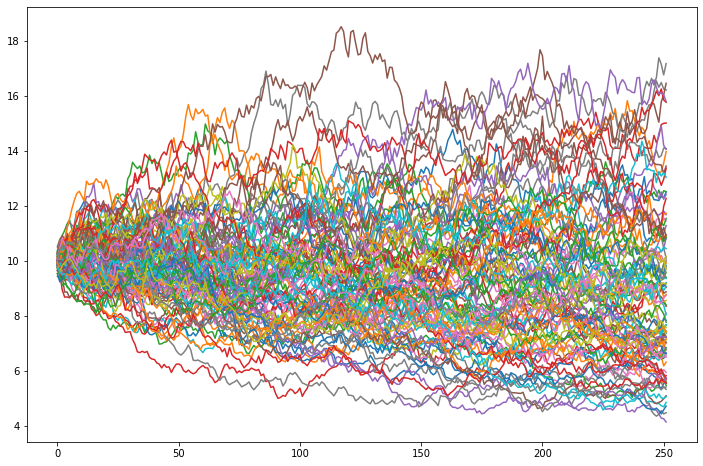

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(12, 8))

USO = pd.read_csv("USO.csv", parse_dates=["Date"], index_col="Date")
StockReturns = pd.Series(USO["USO"].values, index=USO.index)

# Set the simulation parameters
μ = np.mean(StockReturns)
σ = np.std(StockReturns)
T = 252
S0 = 10

# Loop through 100 simulations
for i in range(100):

    # Generate the random returns
    rand_rets = np.random.normal(μ, σ, T) + 1
    
    # Create the Monte carlo path
    forecasted_values = S0*(rand_rets).cumprod()
    
    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)

# Show the simulations
plt.show()

### **Monte Carlo VaR**

Both the return values and the Monte-Carlo paths can be used for analysis of everything ranging from ***option pricing models and hedging to portfolio optimization and trading strategies***.

Aggregate the returns data at each iteration, and use the resulting values to forecast parametric **VaR(99)**.

The parameters `μ`, `σ`, `T`, and `S0` are available from the previous exercise.

* Use the `.append()` method to append the `rand_rets` to `sim_returns` list in each iteration.
* Calculate the parametric **VaR(99)** using the `np.percentile()` function on `sim_returns`.

In [23]:
import numpy as np
import pandas as pd

USO = pd.read_csv("USO.csv", parse_dates=["Date"], index_col="Date")
StockReturns = pd.Series(USO["USO"].values, index=USO.index)

# Set the simulation parameters
μ = np.mean(StockReturns)
σ = np.std(StockReturns)
T = 252
S0 = 10

# Aggregate the returns
sim_returns = []

# Loop through 100 simulations
for i in range(100):

    # Generate the Random Walk
    rand_rets = np.random.normal(μ, σ, T)
    
    # Save the results
    sim_returns.append(rand_rets)

# Calculate the VaR(99)
var_99 = np.percentile(sim_returns, 1)
print("Parametric VaR(99): ", round(100*var_99, 2),"%")

Parametric VaR(99):  -5.09 %
